In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree


#Cargar el conjunto de datos
datos = pd.read_csv('DataSetCovid/covid.csv')

datos.head()



,date,country,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [19]:
datos.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320 entries, 0 to 7319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          7320 non-null   object
 1   country       7320 non-null   object
 2   new_cases     7320 non-null   int64 
 3   new_deaths    7320 non-null   int64 
 4   total_cases   7320 non-null   int64 
 5   total_deaths  7320 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 343.2+ KB


In [45]:
# Eliminar filas con valores faltantes
datos.dropna(inplace=True)

#Seleccionar las columnas de caracteristicas y la columna de etiquetas 
X = datos.iloc[:,:-1]
Y = datos.iloc[:,-1]

# Convertir varibles categoricas en variables numericas
X=pd.get_dummies(X)

#Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=42)

arbol= DecisionTreeClassifier(max_depth=17)
arbol_covid=arbol.fit(X_train, Y_train)

#evaluar el modelo con el conjunto de datos de prueba
score = arbol.score(X_test,Y_test)
print("Accuracy:%.2f%%" %(score * 100.0))

Accuracy:83.81%


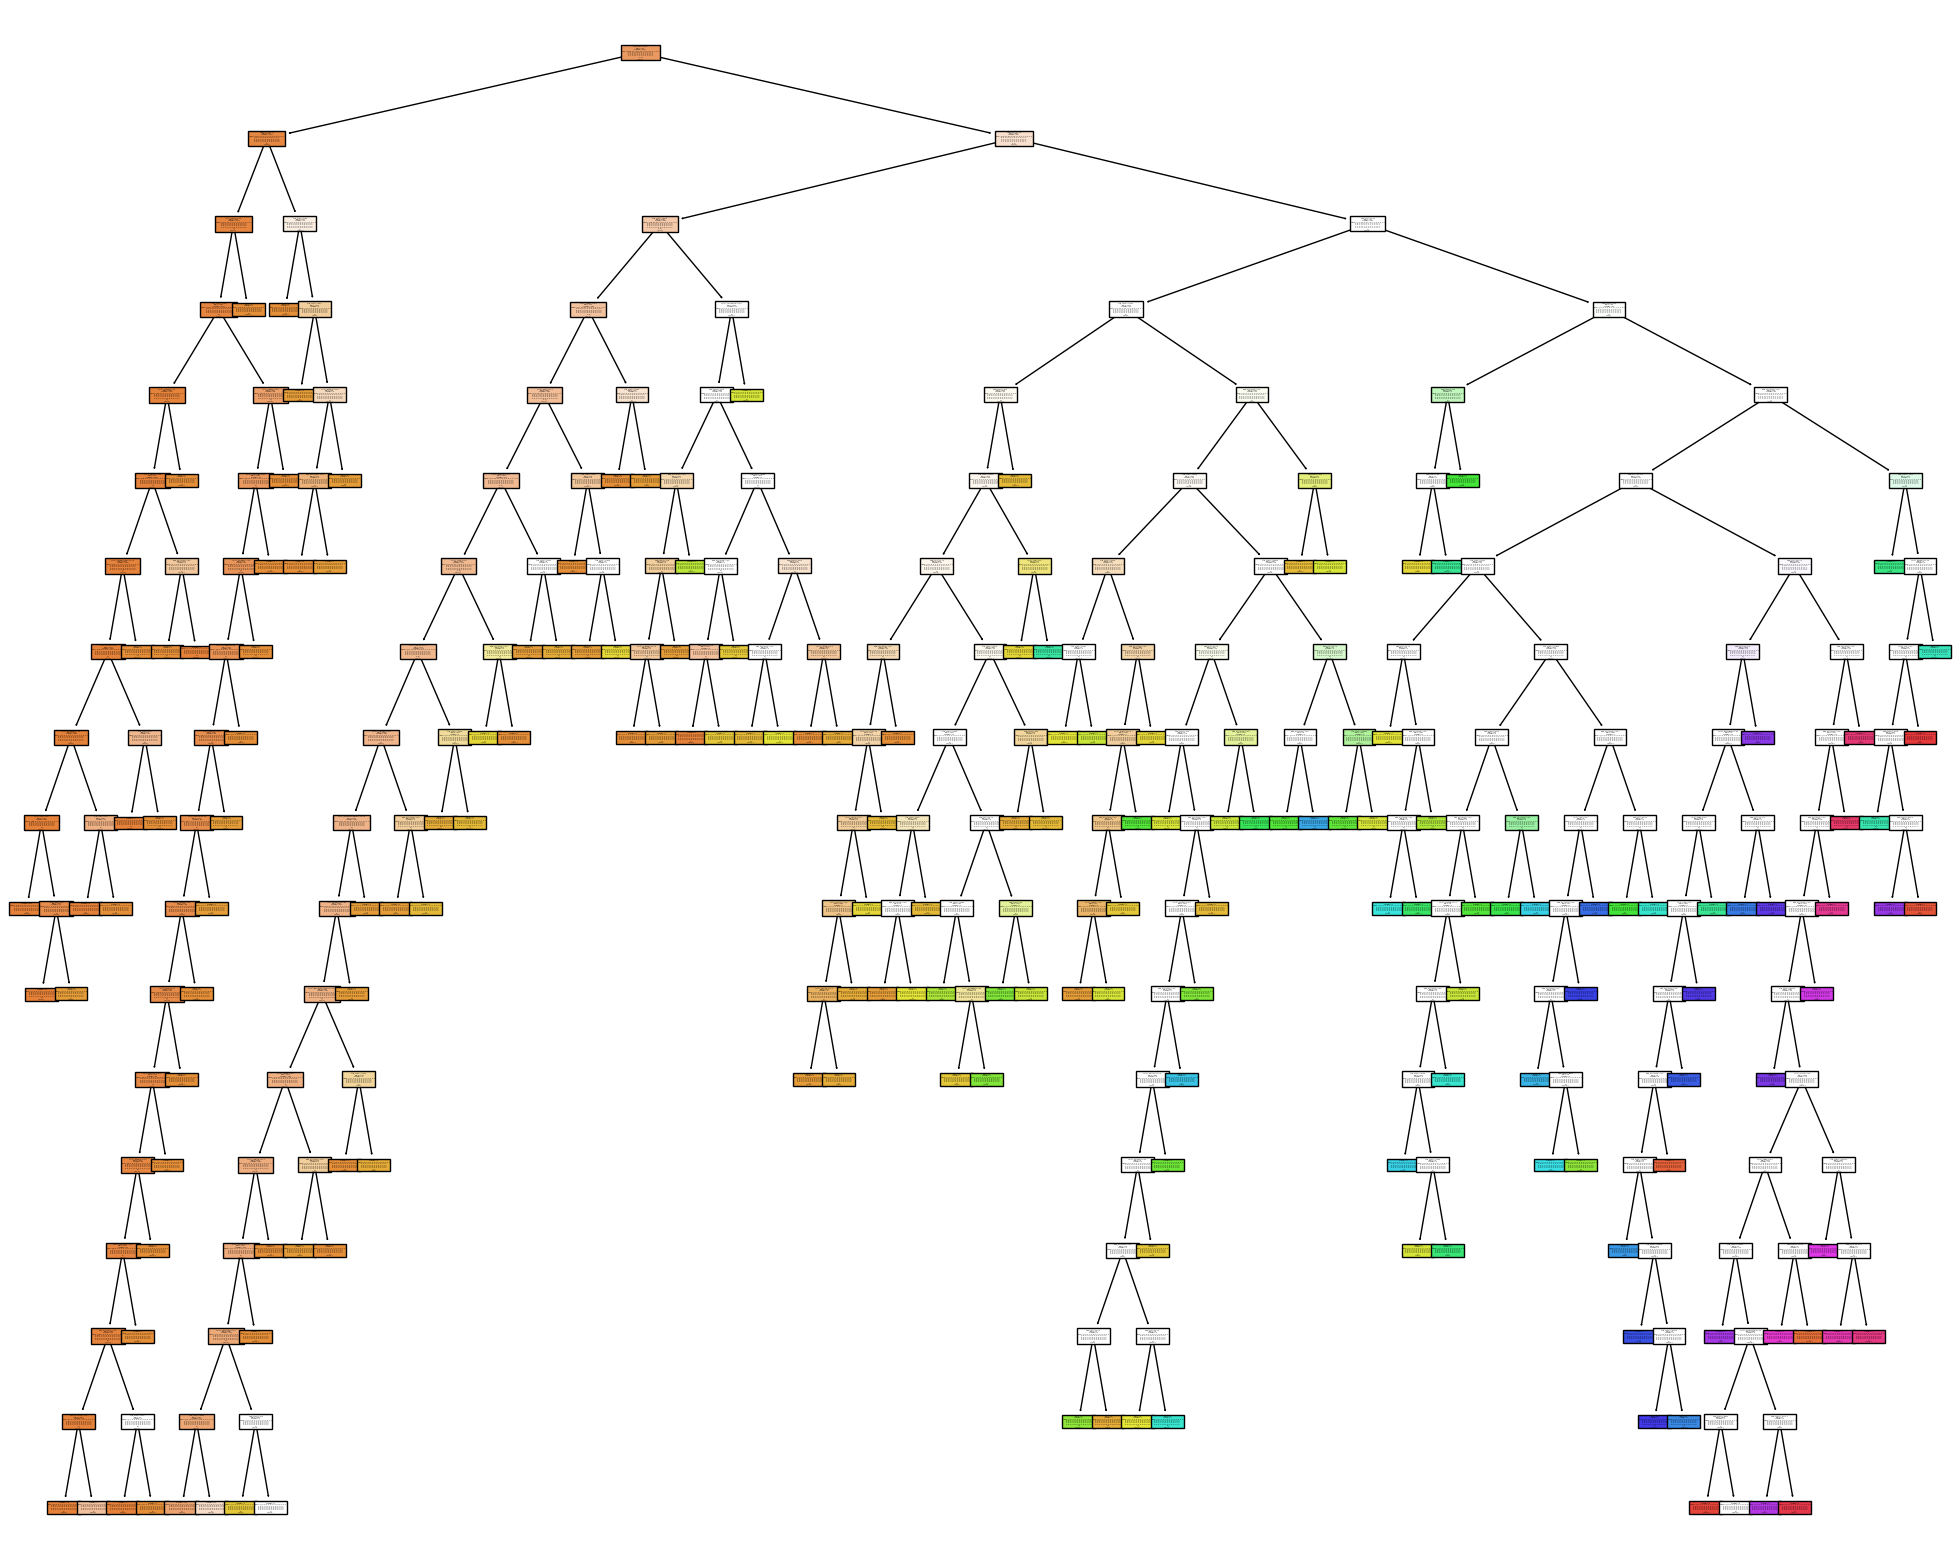

In [44]:
fig = plt.figure(figsize=(25,20)) #dimensiones del grafico
tree.plot_tree(arbol_covid, feature_names=list(X.columns.values), class_names=str(list(Y.values)),filled=True)
plt.show()


In [46]:
fig.savefig("Arbol de decision.png")